In [3]:
# 時系列解析

In [2]:
#1.5 移動平均(時系列変動の平滑化)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
df_historical = pd.read_csv("時系列解析/ソースデータ/m_quote.csv", encoding="Shift_JIS")
df_historical

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,HUF,CZK,PLN,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD,RUB
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,...,*****,*****,*****,NaN,1.39,15.84,*****,9.99,3.77,NaN
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,...,*****,*****,*****,NaN,1.41,15.28,*****,10.10,3.68,NaN
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,...,*****,*****,*****,NaN,1.44,14.93,*****,10.20,3.66,NaN
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,...,*****,*****,*****,NaN,1.34,14.26,*****,9.98,3.56,NaN
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,...,*****,*****,*****,NaN,1.35,14.39,*****,9.97,3.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2022/6/30,133.93,165.14,141.57,104.57,138.04,13.37,19.03,13.75,94.13,...,0.36,5.73,30.5,7.91,0.91,*****,30.46,10.48,4.53,2.34
243,2022/7/29,136.79,164.17,139.46,105.77,141.15,13.18,18.74,13.68,93.78,...,0.35,5.67,29.28,7.87,0.91,*****,30.83,10.47,4.58,2.29
244,2022/8/31,135.26,162.04,136.83,104.69,141.27,13.03,18.39,13.91,93.98,...,0.34,5.57,29.01,7.51,0.91,*****,30.29,10.24,4.49,2.24
245,2022/9/30,143.10,162.22,141.74,107.62,147.04,13.15,19.06,13.98,95.72,...,0.35,5.78,29.93,7.82,0.96,*****,31.54,10.27,4.59,2.39


<AxesSubplot:>

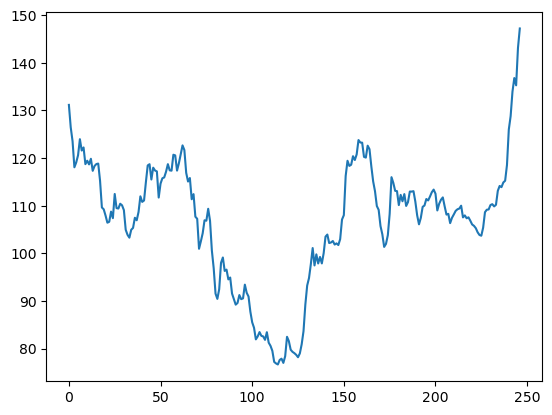

In [16]:
df_historical.USD.plot()

<AxesSubplot:>

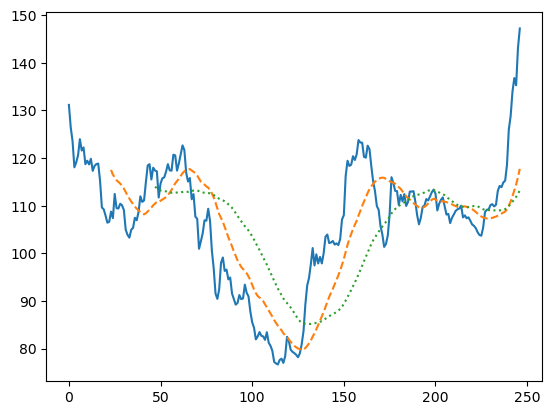

In [20]:
df_historical.USD.plot()
df_historical.USD.rolling(window=24).mean().plot(style='--')
df_historical.USD.rolling(48).mean().plot(style=':')

In [21]:
#1.6 中心化移動平均

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df_ice = pd.read_csv("時系列解析/ソースデータ/icecream.csv", encoding="Shift_JIS")
df_ice

,year,month,expenditure_yen
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<AxesSubplot:>

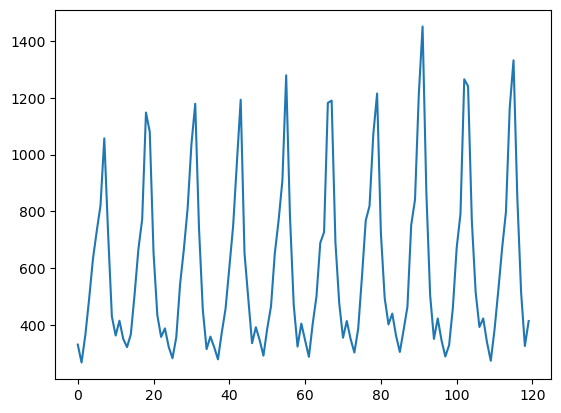

In [34]:
df_ice.expenditure_yen.plot()

<AxesSubplot:>

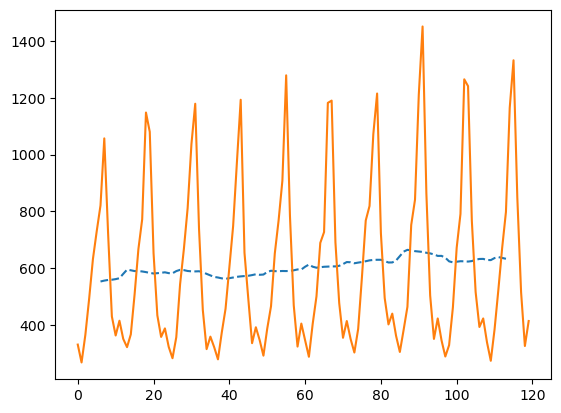

In [35]:
# 移動平均
df_ma = df_ice.expenditure_yen.rolling(window=12).mean().shift(-6)
# 中心化移動平均
df_cma = df_ma.rolling(window=2).mean()

# 中心化移動平均系列
df_cma.plot(style='--', label='CMA')
# 原系列
df_ice.expenditure_yen.plot(label='observation')

In [36]:
#1.7 季節調整

In [37]:
# 原系列(df_ice.expenditure_yen)/中心化移動平均系列(df_cma) 
df_orig_div_cma = df_ice.expenditure_yen / df_cma               ()

# 月毎に加算
orig_div_cma = df_orig_div_cma.values
s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
for idx in range(len(orig_div_cma)//12):
    # 12ヶ月ごとにデータを抽出
    cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
    mask = cut_orig_div_cma!=cut_orig_div_cma
    # numpy.whereを使用して非数(nan)を0にして加算する
    counter += np.where(mask, 0, 1)
    s_index += np.where(mask, 0, cut_orig_div_cma)

# 加算結果の各月平均
s_index /= counter
# 全体を1200に合わせ季節指数を計算
s_index = s_index / s_index.sum() * 1200
s_index

array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])

<AxesSubplot:>

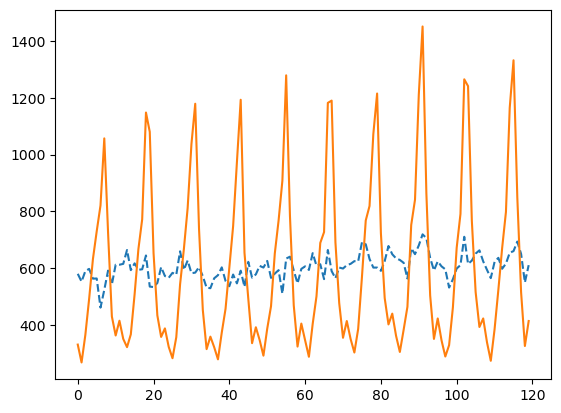

In [38]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが1月なのでtileして12ヶ月分の季節指数を繰り返すだけで良い
tiled_s_index = np.tile(s_index, len(orig_div_cma)//12)

# 季節調整済み系列の計算
df_adjusted_series = df_ice.expenditure_yen / tiled_s_index * 100

# 季節調整済み系列
df_adjusted_series.plot(style='--', label='adjusted')
# 原系列
df_ice.expenditure_yen.plot(label='observation')

In [39]:
#1.8 移動平均乖離率

<AxesSubplot:>

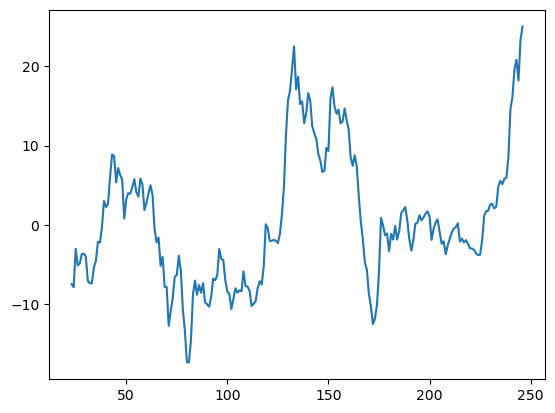

In [40]:
ma24 = df_historical.USD.rolling(24).mean()
diff_ma24 = (df_historical.USD - ma24) / ma24 * 100
diff_ma24.plot()

<AxesSubplot:ylabel='Frequency'>

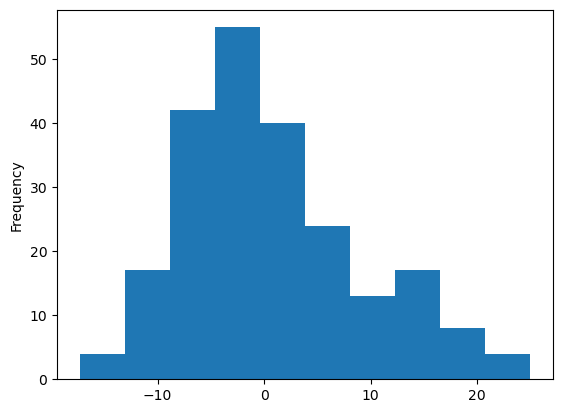

In [41]:
diff_ma24.plot.hist()

In [42]:
#1.9 時系列データの基本統計量と前処理

<AxesSubplot:ylabel='Frequency'>

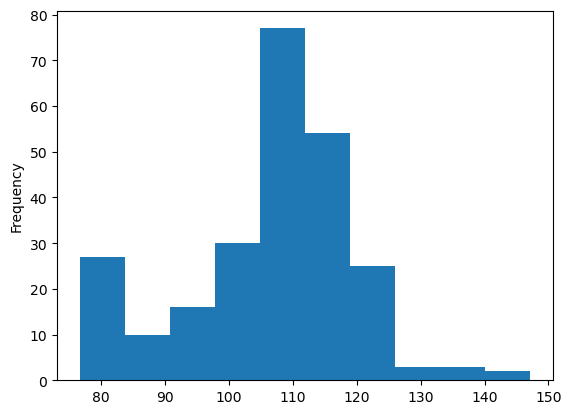

In [43]:
#1.9.4 統計的仮説検定
df_historical.USD.plot.hist()

<AxesSubplot:ylabel='Frequency'>

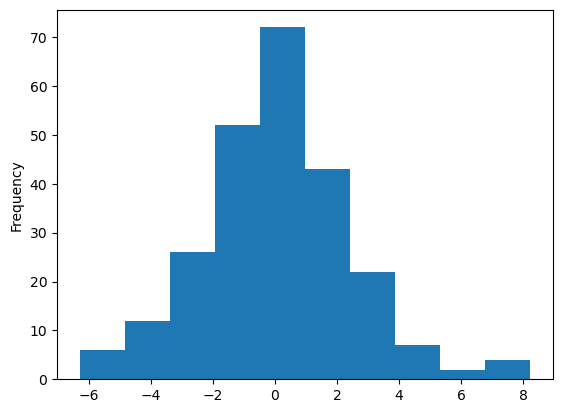

In [44]:
# 1次階差
# 階差をとることで値が欠損する行が生じるためdropna()でその行を削除する
df_diff1 = df_historical.USD.diff().dropna()
# 1次階差系列のヒストグラムの表示
df_diff1.plot.hist()

In [47]:
import scipy.stats as stats

# 1次階差系列のShapiro-Wilk検定
stats.shapiro(df_diff1.values)

ShapiroResult(statistic=0.9820889234542847, pvalue=0.003405200783163309)

In [48]:
# 原系列のShapiro-Wilk検定
stats.shapiro(df_historical.USD.values)

ShapiroResult(statistic=0.9501556158065796, pvalue=1.746932554169689e-07)

In [49]:
#1.9.5 時間依存性の発見

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import io
import requests

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = content['#Passengers']

In [51]:
import statsmodels.api as sm

# 自己相関
p_acf = sm.tsa.stattools.acf(passengers)

# 偏自己相関
p_pacf = sm.tsa.stattools.pacf(passengers, method='ols')
p_acf, p_pacf

(array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
        0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
        0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
        0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
        0.4416288 , 0.45722376]),
 array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
         0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
         0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
         0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
        -0.04046447,  0.13739883]))

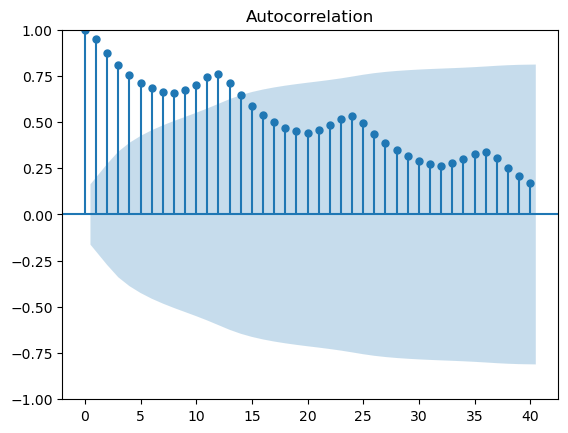

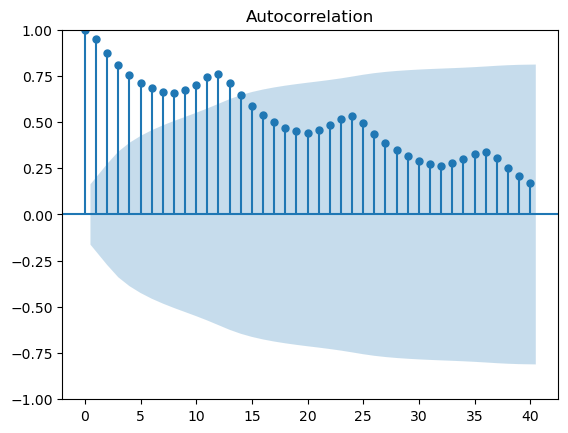

In [52]:
sm.graphics.tsa.plot_acf(passengers, lags=40)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


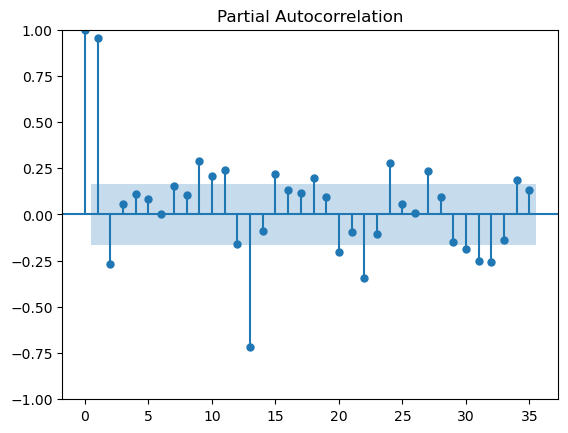

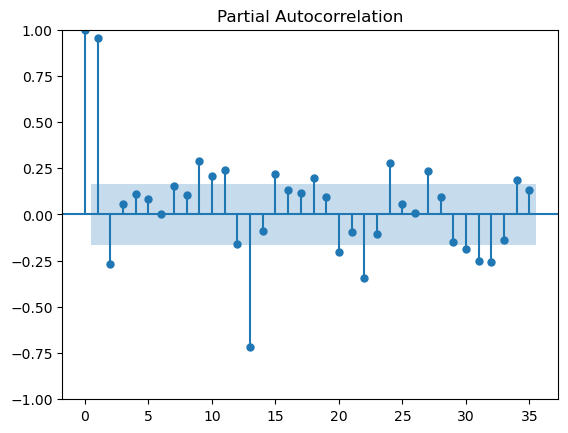

In [53]:
sm.graphics.tsa.plot_pacf(passengers, lags=35)

In [1]:
#2.2 ARモデル

In [20]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

ImportError: cannot import name 'ar' from 'statsmodels.tsa.ar_model' (/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py)

<AxesSubplot:>

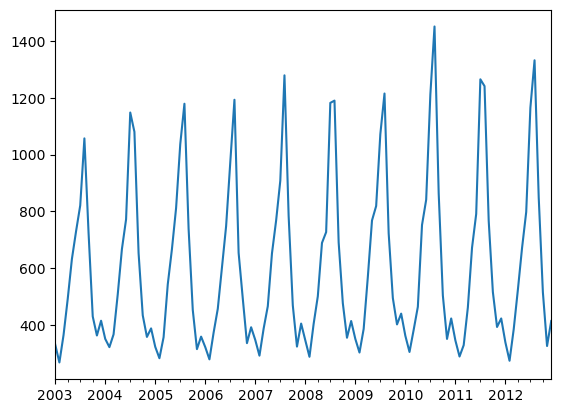

In [4]:
# アイスクリーム消費データ
df_ice = pd.read_csv('時系列解析/ソースデータ/icecream.csv')

# 月ごとの家庭平均消費額のみを抽出し
# インデックスを2003年1月からの月ごとにする
y = pd.Series(df_ice.expenditure_yen.values, 
              index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [5]:
# ADF検定：定常過程であるかどうかの確認

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.308955850882182, 0.1692244861968732, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484143)
ct:
(-1.7145601999710613, 0.7444294601457631, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694246, 0.8583259363632654, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.6310949179759107, 0.9751761218376868, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328063)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


<AxesSubplot:>

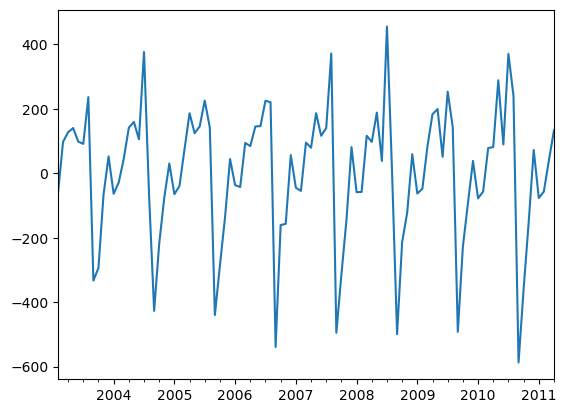

In [6]:
# タプル内の2番目がp値で、全て高く単位根過程である仮説を棄却できず、定常過程ではない。
# →1次階差をとって、定常過程に変換する

y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [7]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-20.494138790574038, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214955)
ct:
(-20.51282538674092, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902558)
c:
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415187)
nc:
(-20.33772445910238, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068396)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [30]:
# 全てのパターンでp値が0.05を下回っていて定常過程であることがわかる。
# →1次階差系列が定常過程だと確認。ARモデルを構築する。

# ラグの次数を赤池情報量規準で決定する。

model = ar_model.AR(y_diff)
for i in range(20):
    results = model.fit(maxlag=i+1)
    print('lag = ', i+1, 'aic : ', results.aic)
    
    
# statsmodel 0.13系からはARが廃止となり、AutoRegを使用するらしい

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [32]:
# AutoRegの使用例が載ったサイトを発見
# https://oneopeadoauo-mt.hatenablog.com/entry/2022/03/14/215125

for i in range(20):
    model = ar_model.AutoReg(y_diff, i+1)
    results = model.fit()
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  1319.2002363463098
lag =  2 aic :  1304.0197864939166
lag =  3 aic :  1293.0884574632883
lag =  4 aic :  1281.7253591677493
lag =  5 aic :  1266.8283707583764
lag =  6 aic :  1240.2184395374745
lag =  7 aic :  1227.236081706349
lag =  8 aic :  1199.8618885960686
lag =  9 aic :  1168.5285182810348
lag =  10 aic :  1102.2890529620913
lag =  11 aic :  1014.3206848715979
lag =  12 aic :  1006.0719822391264
lag =  13 aic :  996.4783471223761
lag =  14 aic :  988.1539665706359
lag =  15 aic :  979.444884976763
lag =  16 aic :  971.0582271698917
lag =  17 aic :  962.564194219886
lag =  18 aic :  935.5999156962922
lag =  19 aic :  926.7391631562662
lag =  20 aic :  916.7418813228519


In [34]:
# AICが教科書の値と大きく異なる
# サイトを参考にして、AICが最も小さくなるラグを求める

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(y_diff, regression='c', maxlag=20, autolag='AIC')
print(f'検定統計量 : {test_result[0]}、p値：{test_result[1]}、使用したラグ：{test_result[2]}、データ数：{test_result[3]}')
print(f'有意水準1%点：{test_result[4]["1%"]}、有意水準5%点：{test_result[4]["5%"]}、有意水準10%点：{test_result[4]["10%"]}')

検定統計量 : -20.635999245555652、p値：0.0、使用したラグ：10、データ数：88
有意水準1%点：-3.506944401824286、有意水準5%点：-2.894989819214876、有意水準10%点：-2.584614550619835


<BarContainer object of 88 artists>

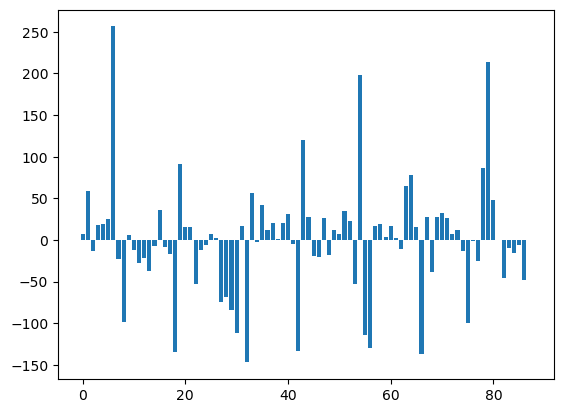

In [41]:
# モデルの当てはめ
results11 = ar_model.AutoReg(y_diff, 11).fit()

# 残差
res11 = results11.resid

# 残差の出力
plt.bar(range(len(res11)), res11)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


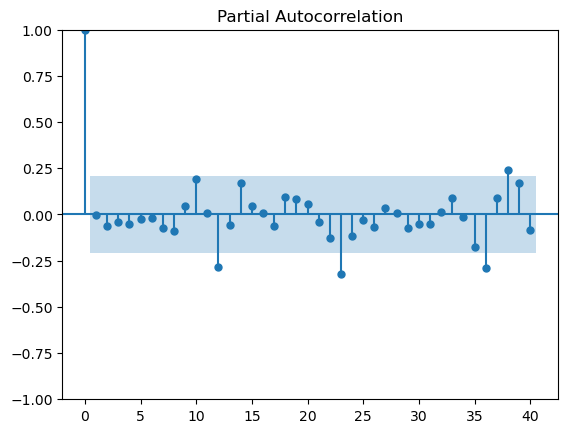

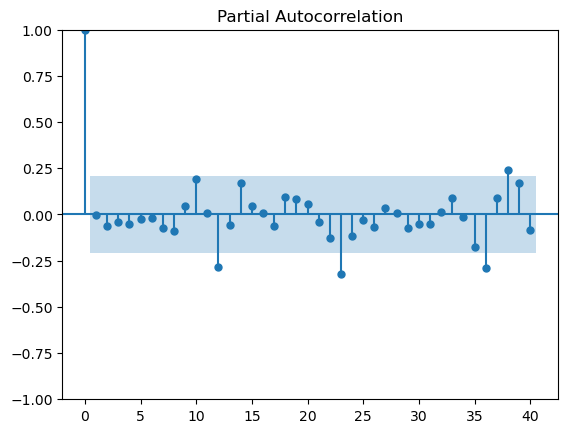

In [42]:
# 偏自己相関
tsaplots.plot_pacf(res11, lags=40)

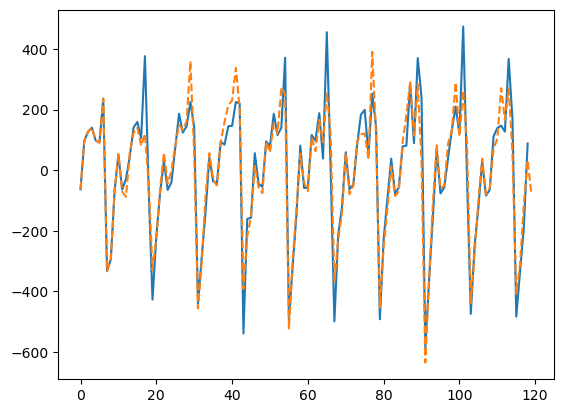

In [43]:
# 将来予測
# 原系列の表示
plt.plot(y.diff().dropna().values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y_diff[:11], 
                    results11.fittedvalues, 
                    results11.predict(98-11, 107, dynamic=True))), 
    '--', label="forecast")

In [61]:
# 2.4 ARMAモデル

%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
# from statsmodels.tsa.arima_model import ARMA     #statsmodel0.13系からは削除
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:>

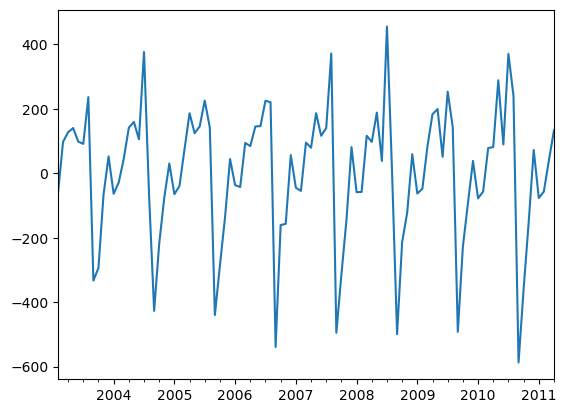

In [112]:
df_ice = pd.read_csv('時系列解析/ソースデータ/icecream.csv')
y = pd.Series(df_ice.expenditure_yen.values, 
              index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y = y.astype('f')
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [113]:
# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization 

((4, 2), (4, 2))

In [126]:
# AICおよびBICで次数(4,2)が最適だとわかる
# p=4, q=2のARMAモデルのインスタンスを生成
model = ARIMA(y_diff, (4, 2))
# y_diffに対してモデルを当てはめる
results = model.fit()
# 残差の抽出
res = results.resid
# 残差の出力
plt.bar(range(len(res)), res)


ValueError: endog and exog matrices are different sizes

In [70]:
# 2.5 ARIMAモデル

In [80]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:xlabel='Month'>

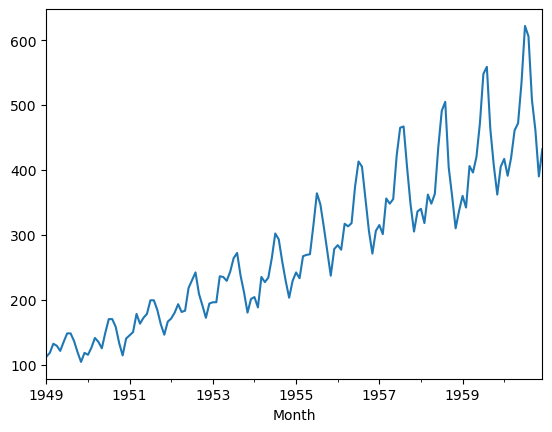

In [81]:
import requests
import io

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], 
                                     infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

In [84]:
# データ全体で144時点あるが、前半の120時点をモデル構築に使用して、後半24時点を長期予測の確認のため使用する。
# 前半120時点の身を格納した変数をy120とする。

y120 = y[:120]

# 階差をとらないモデル(p=3,d=0,q=2)
model_d0 = ARIMA(y120, (3, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

ValueError: endog and exog matrices are different sizes

In [127]:
# 6ステップでマスターする機械学習

In [128]:
# 3-39. サポートベクターマシン

In [129]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# 学習データととリーニングデータの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

# 評価指標の生成
print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))
print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Test - Confusion matrix :", metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("Test - classification report :", metrics.classification_report
(y_test, clf.predict(X_test)))

Class labels: [0 1 2]
Train - Accuracy : 0.9523809523809523
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weight

In [130]:
# 3-40. SVMの決定境界線の設定

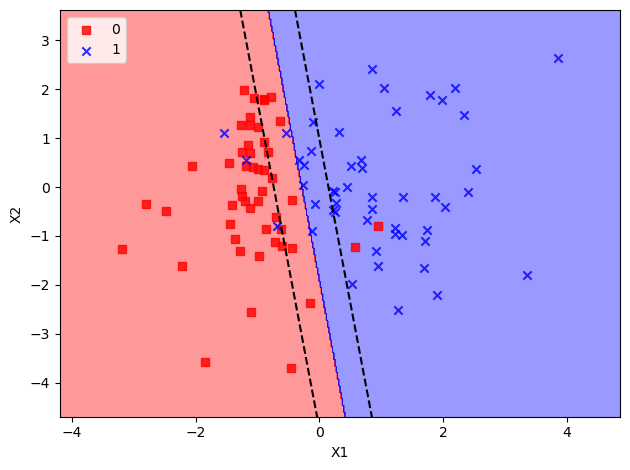

In [131]:
#sklearnのmake_classification関数を使ってテストデータを作ってみよう
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=0)

# 単純なロジスティック回帰モデルの構築
clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

# 分離するための超平面を作成
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# サポートベクタルを通過する超平面をプロット
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


# 決定境界をプロットする
def plot_decision_regions(X, y, classifier):
    
    h = .02  # メッシュのステップサイズを設定
    # カラーマップを作成
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定境界のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=clf)

# 直線，点，平面に最も近いベクトルをプロットする
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()